In [2]:
# CSE 331 Project Implementation of merge sort
def merge_sort(data) -> None:
    """
    Sorts a list in-place using a merge sort algorithm
    :param data: List of type T to be sorted
    """
    # If length is not more than one, data is already sorted
    if len(data) <= 1:
        return

    # split the array in half
    middle = len(data) // 2
    left = data[:middle]
    right = data[middle:]

    merge_sort(left)
    merge_sort(right)

    # Set up indices to perform merge
    left_index = right_index = index = 0

    # Merge the left and right sub-arrays together
    while left_index < len(left) and right_index < len(right):
        # if left[left_index] < right[right_index]:
        if left[left_index] < right[right_index]:
            data[index] = left[left_index]
            left_index += 1
        else:
            data[index] = right[right_index]
            right_index += 1
        index += 1

    if left_index < len(left):
        data[index:] = left[left_index:]
    else:
        data[index:] = right[right_index:]

In [3]:
# CSE 331 Project implementation of hybrid sort 
def insertion_sort(data) -> None:
    """
    Sorts a list in place using insertion sort algorithm.
    :param data: List of type T to be sorted
    """
    # Traverse the list with two indices, i & j.
    for i in range(1, len(data)):
        # Value to insert for this iteration
        target = data[i]

        # Moving backwards from the target index, find the appropriate
        # index to insert target value.
        #
        # Shift all values greater than the target forward.
        j = i - 1
        while j >= 0 and target < data[j]:
            data[j + 1] = data[j]
            j -= 1
        data[j + 1] = target

In [4]:
def hybrid_merge_sort(data, threshold: int = 12) -> None:
    """
    Sorts a list in-place using a hybrid sort with the merge sort and insertion sort algorithms
    Uses insertion_sort to sort lists once their size is less than or equal to threshold,
    and otherwise performs a merge sort
    :param data: List of type T to be sorted
    :param threshold: Maximum size at which insertion sort will be used instead of merge sort
    """
    # If length is not more than one, data is already sorted
    if len(data) <= 1:
        return

    # Defer to insertion sort if data length is less than threshold
    if len(data) <= threshold:
        insertion_sort(data)
    else:
        # split the array in half
        middle = len(data) // 2
        left = data[:middle]
        right = data[middle:]

        hybrid_merge_sort(left, threshold)
        hybrid_merge_sort(right, threshold)

        # Set up indices to perform merge
        left_index = right_index = index = 0

        # Merge the left and right sub-arrays together
        while left_index < len(left) and right_index < len(right):
            # if left[left_index] < right[right_index]:
            if left[left_index] < right[right_index]:
                data[index] = left[left_index]
                left_index += 1
            else:
                data[index] = right[right_index]
                right_index += 1
            index += 1

        if left_index < len(left):
            data[index:] = left[left_index:]
        else:
            data[index:] = right[right_index:]

In [12]:
import random
from time import perf_counter

hybridSort = []
mergeSort = []
insertionSort = []
nums = []

for i in range(1,100):
    
    nums.append(i)
    
    num = 0
    tempHybrid = []
    
    while num < 100:
        randomlist = [random.randint(1,10000) for j in range(0, 1000)]
        temp1 = randomlist.copy()

        curr1 = perf_counter()
        hybrid_merge_sort(temp1,i)
        end1 = perf_counter()
        
        tempHybrid.append(end1-curr1)
        num += 1
        
    hybridSort.append(sum(tempHybrid)/len(tempHybrid))

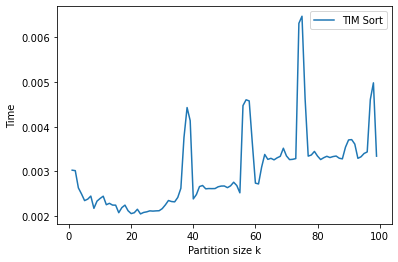

In [15]:
import matplotlib.pyplot as plt

plt.plot(nums, hybridSort)
plt.legend(['TIM Sort'])

plt.ylabel("Time")
plt.xlabel("Partition size k")
plt.show()

In [16]:
import random
from time import perf_counter

insertionSort = []
mergeSort = []
hybridSort = []
nums = []

for i in range(1,1000,10):
    
    nums.append(i)
    
    num = 0
    tempInsertionSort = []
    tempMergeSort = []
    tempHybridSort = []
    
    while num < 100:
        randomlist = [random.randint(1,10000) for j in range(0,i)]
        temp1 = randomlist.copy()
        temp2 = randomlist.copy()
        temp3 = randomlist.copy()
        
        curr1 = perf_counter()
        insertion_sort(temp1)
        end1 = perf_counter()

        tempInsertionSort.append(end1-curr1)

        curr2 = perf_counter()
        merge_sort(temp2)
        end2 = perf_counter()
        
        tempMergeSort.append(end2-curr2)
        
        curr3 = perf_counter()
        hybrid_merge_sort(temp3, 22)
        end3 = perf_counter()
        
        tempHybridSort.append(end3-curr3)
        
        num += 1
        
    insertionSort.append(sum(tempInsertionSort)/len(tempInsertionSort))
    mergeSort.append(sum(tempMergeSort)/len(tempMergeSort))
    hybridSort.append(sum(tempHybridSort)/len(tempHybridSort))

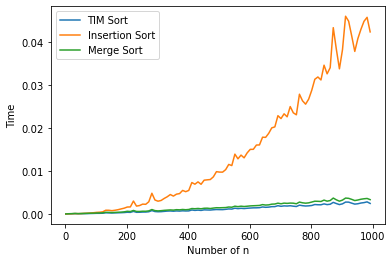

In [17]:
import matplotlib.pyplot as plt

plt.plot(nums, hybridSort)
plt.plot(nums, insertionSort)
plt.plot(nums, mergeSort)
plt.legend(['TIM Sort', 'Insertion Sort', 'Merge Sort'])

plt.ylabel("Time")
plt.xlabel("Number of n")
plt.show()

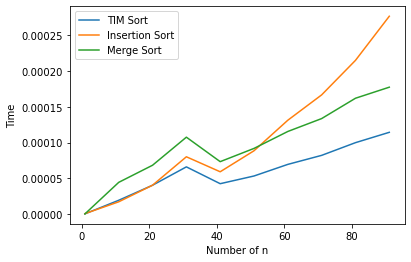

In [18]:
import matplotlib.pyplot as plt

plt.plot(nums[:10], hybridSort[:10])
plt.plot(nums[:10], insertionSort[:10])
plt.plot(nums[:10], mergeSort[:10])
plt.legend(['TIM Sort', 'Insertion Sort', 'Merge Sort'])

plt.ylabel("Time")
plt.xlabel("Number of n")
plt.show()